# Portfolio Part 4

**Student Name : Mahdiyar Ebrahimi**  
**Student ID : 47369590**

# Sydney Rain Prediction Based On Weather Data

The Dataset contains the data of weather of different cities in Australia from 1 November 2007 to 25 June 2017, but we are going to use just the weather data of Sydney.

The objective of the analysis task is to train two models: logistic regression and K-Nearest Neighbor (KNN), to predict whether it will rain tomorrow based on today's weather data such as humidity, wind direction, temperature, etc. This involves a typical Data Science workflow, which includes data preparation and exploration, model building, making predictions, and evaluating outcomes.

### Data Description
- **Location** - Name of the city from Australia.  
- **MinTemp** - The Minimum temperature during a particular day. (degree Celsius)  
- **MaxTemp** - The maximum temperature during a particular day. (degree Celsius)  
- **Rainfall** - Rainfall during a particular day. (millimeters)  
- **Evaporation** - Evaporation during a particular day. (millimeters)  
- **Sunshine** - Bright sunshine during a particular day. (hours)  
- **WindGusDir** - The direction of the strongest gust during a particular day. (16 compass points)  
- **WindGuSpeed** - Speed of strongest gust during a particular day. (kilometers per hour)  
- **WindDir9am** - The direction of the wind for 10 min prior to 9 am. (compass points)  
- **WindDir3pm** - The direction of the wind for 10 min prior to 3 pm. (compass points)  
- **WindSpeed9am** - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)  
- **WindSpeed3pm** - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)  
- **Humidity9am** - The humidity of the wind at 9 am. (percent)  
- **Humidity3pm** - The humidity of the wind at 3 pm. (percent)  
- **Pressure9am** - Atmospheric pressure at 9 am. (hectopascals)  
- **Pressure3pm** - Atmospheric pressure at 3 pm. (hectopascals)  
- **Cloud9am** - Cloud-obscured portions of the sky at 9 am. (eighths)  
- **Cloud3pm** - Cloud-obscured portions of the sky at 3 pm. (eighths)  
- **Temp9am** - The temperature at 9 am. (degree Celsius)  
- **Temp3pm** - The temperature at 3 pm. (degree Celsius)  
- **RainToday** - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.  
- **RainTomorrow** - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).  

### Import Australia Weather Dataset

In [405]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('weatherAUS.csv')

## Data Prepration and Exploration

In [406]:
df = df[df['Location'] == 'Sydney']
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [407]:
df.shape

(3344, 23)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3344 non-null   object 
 1   Location       3344 non-null   object 
 2   MinTemp        3340 non-null   float64
 3   MaxTemp        3342 non-null   float64
 4   Rainfall       3337 non-null   float64
 5   Evaporation    3293 non-null   float64
 6   Sunshine       3328 non-null   float64
 7   WindGustDir    2306 non-null   object 
 8   WindGustSpeed  2306 non-null   float64
 9   WindDir9am     3288 non-null   object 
 10  WindDir3pm     3311 non-null   object 
 11  WindSpeed9am   3318 non-null   float64
 12  WindSpeed3pm   3319 non-null   float64
 13  Humidity9am    3329 non-null   float64
 14  Humidity3pm    3331 non-null   float64
 15  Pressure9am    3323 non-null   float64
 16  Pressure3pm    3325 non-null   float64
 17  Cloud9am       2776 non-null   float64
 18  Clo

We have 6 non-numerical columns that we need to convert including Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow

In [409]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3340.000000,3342.000000,3337.000000,3293.000000,3328.000000,2306.000000,3318.000000,3319.000000,3329.000000,3331.000000,3323.000000,3325.000000,2776.000000,2781.000000,3339.000000,3340.000000
mean,14.866826,23.001975,3.324543,5.189220,7.179567,41.757589,15.075347,19.324797,68.221989,54.694386,1018.343906,1016.018163,4.180115,4.218626,17.821923,21.533473
std,4.551618,4.493735,9.887184,2.776891,3.814186,12.996404,7.080807,7.484198,15.076079,16.282223,7.019436,7.032160,2.748952,2.640789,4.895861,4.301543
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,31.000000,9.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,4.500000,4.000000,18.200000,21.300000
75%,18.725000,26.000000,1.400000,7.000000,10.200000,50.000000,20.000000,24.000000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


There are two methods to handling the missing values (Null values), first method is that we can delete all the rows that contain null values, and second method is that we can replace missing values with the mean. The second one is the most common method and we are going to implement that, but first we need to remove the outliers.

### Removing the Outliers

There are many methods for removing the outliers but we are going to first implement IQR method and then we will see if there are any outliers in out dataset or not with using boxplot.

In [410]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df < lower_bound) | (df > upper_bound)

df = df[~outliers.any(axis=1)]

In [411]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30181,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,...,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
30186,2008-02-11,Sydney,16.4,23.9,0.0,6.4,8.0,NaN,NaN,WNW,...,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,No,No
30187,2008-02-12,Sydney,18.9,27.3,0.0,6.8,6.7,NaN,NaN,N,...,68.0,67.0,1010.7,1007.5,7.0,7.0,22.9,24.7,No,Yes
30189,2008-02-14,Sydney,16.9,24.3,3.0,3.2,8.7,NaN,NaN,SSW,...,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,Yes,No
30190,2008-02-15,Sydney,18.3,24.4,0.0,6.2,8.5,NaN,NaN,SW,...,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,No,No


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'MinTemp'),
  Text(2, 0, 'MaxTemp'),
  Text(3, 0, 'Rainfall'),
  Text(4, 0, 'Evaporation'),
  Text(5, 0, 'Sunshine'),
  Text(6, 0, 'WindGustSpeed'),
  Text(7, 0, 'WindSpeed9am'),
  Text(8, 0, 'WindSpeed3pm'),
  Text(9, 0, 'Humidity9am'),
  Text(10, 0, 'Humidity3pm'),
  Text(11, 0, 'Pressure9am'),
  Text(12, 0, 'Pressure3pm'),
  Text(13, 0, 'Cloud9am'),
  Text(14, 0, 'Cloud3pm'),
  Text(15, 0, 'Temp9am'),
  Text(16, 0, 'Temp3pm')])

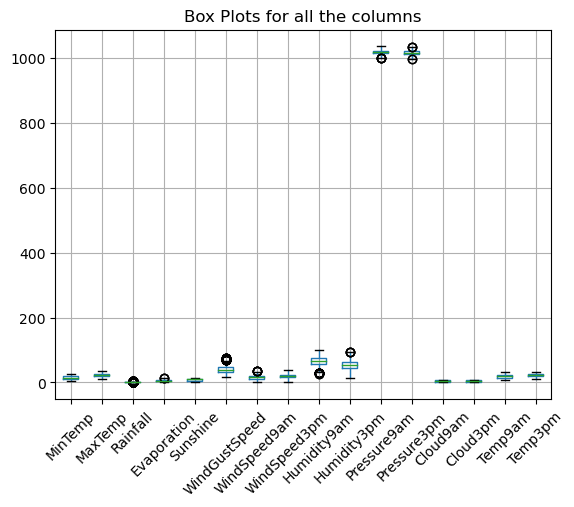

In [412]:
df.boxplot()
plt.title("Box Plots for all the columns")
plt.xticks(rotation=45)

As We can see after implementing the IQR method, still we have some outliers in some of columns.

### Handling the missing values

First we need to check which columns have missing values

In [413]:
missing_values = df.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
MinTemp            3
MaxTemp            2
Rainfall           6
Evaporation       16
Sunshine          10
WindGustDir      807
WindGustSpeed    807
WindDir9am        38
WindDir3pm        16
WindSpeed9am      18
WindSpeed3pm      16
Humidity9am       13
Humidity3pm       12
Pressure9am       16
Pressure3pm       18
Cloud9am         429
Cloud3pm         427
Temp9am            5
Temp3pm            4
RainToday          6
RainTomorrow       7
dtype: int64


## Converting Categorical values to Numerical

In this part we need to convert the categorical fields such as  to numerical

In [414]:
enc = OrdinalEncoder()
df_new = df.copy()
df_new[['Date', 'Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']] = enc.fit_transform(df_new[['Date', 'Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']])

Now we can replace the missing values with mean in order to handle the missing values

In [415]:
df_new['MinTemp'] = df_new['MinTemp'].fillna(df_new['MinTemp'].mean())
df_new['MaxTemp'] = df_new['MaxTemp'].fillna(df_new['MaxTemp'].mean())
df_new['Rainfall'] = df_new['Rainfall'].fillna(df_new['Rainfall'].mean())
df_new['Evaporation'] = df_new['Evaporation'].fillna(df_new['Evaporation'].mean())
df_new['Sunshine'] = df_new['Sunshine'].fillna(df_new['Sunshine'].mean())
df_new['WindGustSpeed'] = df_new['WindGustSpeed'].fillna(df_new['WindGustSpeed'].mean())
df_new['WindSpeed9am'] = df_new['WindSpeed9am'].fillna(df_new['WindSpeed9am'].mean())
df_new['WindSpeed3pm'] = df_new['WindSpeed3pm'].fillna(df_new['WindSpeed3pm'].mean())
df_new['Humidity9am'] = df_new['Humidity9am'].fillna(df_new['Humidity9am'].mean())
df_new['Humidity3pm'] = df_new['Humidity3pm'].fillna(df_new['Humidity3pm'].mean())
df_new['Pressure9am'] = df_new['Pressure9am'].fillna(df_new['Pressure9am'].mean())
df_new['Pressure3pm'] = df_new['Pressure3pm'].fillna(df_new['Pressure3pm'].mean())
df_new['Cloud9am'] = df_new['Cloud9am'].fillna(df_new['Cloud9am'].mean())
df_new['Cloud3pm'] = df_new['Cloud3pm'].fillna(df_new['Cloud3pm'].mean())
df_new['Temp9am'] = df_new['Temp9am'].fillna(df_new['Temp9am'].mean())
df_new['Temp3pm'] = df_new['Temp3pm'].fillna(df_new['Temp3pm'].mean())
df_new['WindGustDir'] = df_new['WindGustDir'].fillna(df_new['WindGustDir'].mode()[0])
df_new['WindDir9am'] = df_new['WindDir9am'].fillna(df_new['WindDir9am'].mode()[0])
df_new['WindDir3pm'] = df_new['WindDir3pm'].fillna(df_new['WindDir3pm'].mode()[0])
df_new['RainToday'] = df_new['RainToday'].fillna(df_new['RainToday'].mode()[0])
df_new['RainTomorrow'] = df_new['RainTomorrow'].fillna(df_new['RainTomorrow'].mode()[0])

In [416]:
df_new.shape

(2578, 23)

In [417]:
df_new.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30181,0.0,0.0,20.2,27.2,1.6,2.6,8.6,13.0,39.556748,13.0,...,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1.0,1.0
30186,1.0,0.0,16.4,23.9,0.0,6.4,8.0,13.0,39.556748,14.0,...,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,0.0,0.0
30187,2.0,0.0,18.9,27.3,0.0,6.8,6.7,13.0,39.556748,3.0,...,68.0,67.0,1010.7,1007.5,7.0,7.0,22.9,24.7,0.0,1.0
30189,3.0,0.0,16.9,24.3,3.0,3.2,8.7,13.0,39.556748,11.0,...,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,1.0,0.0
30190,4.0,0.0,18.3,24.4,0.0,6.2,8.5,13.0,39.556748,12.0,...,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,0.0,0.0


## Studying The Correlation Between Features

In [418]:
corr_matrix = df_new.corrwith(df_new['RainTomorrow']).drop('RainTomorrow')

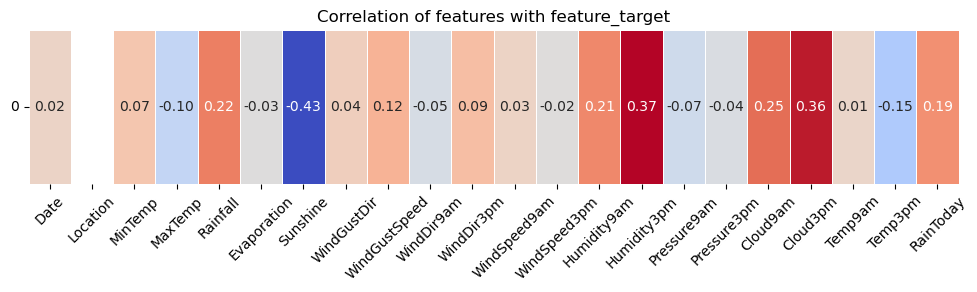

In [419]:
plt.figure(figsize=(12, 2)) 
sns.heatmap(corr_matrix.to_frame().T, cmap='coolwarm', annot=True, cbar=False, linewidths=.5, fmt=".2f")
plt.title('Correlation of features with feature_target')
plt.yticks(rotation=0)
plt.xticks(rotation=45)  
plt.show()

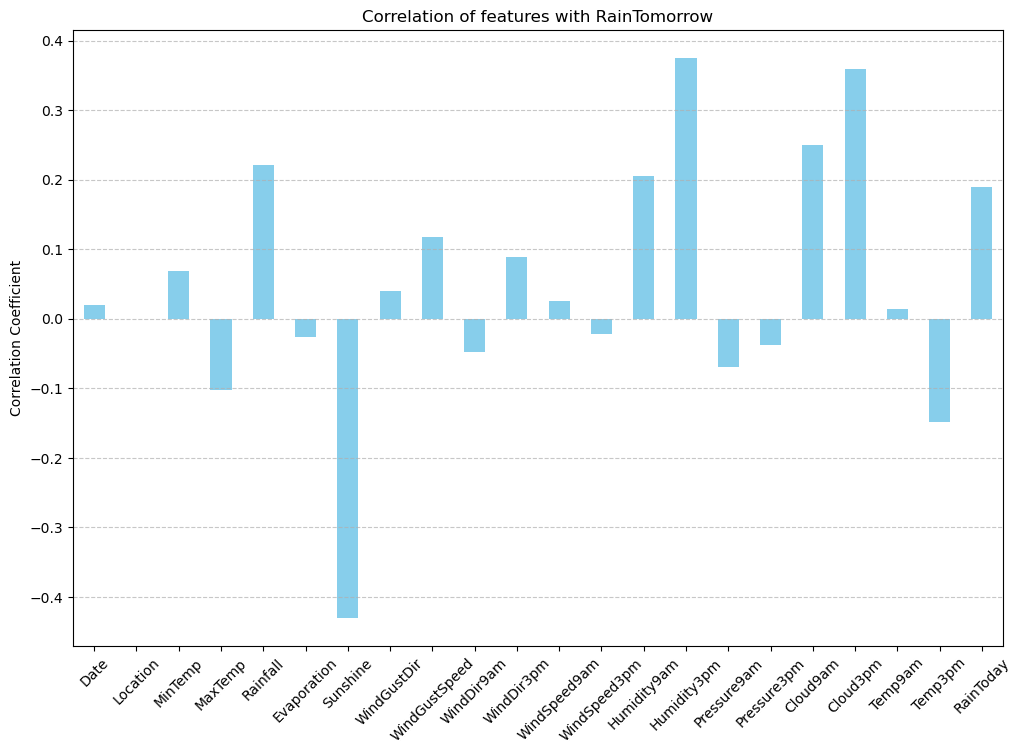

In [420]:
plt.figure(figsize=(12, 8))
corr_matrix.plot(kind='bar', color='skyblue')
plt.title('Correlation of features with RainTomorrow')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The most correlated features are **Sunshine**, **Humidity9am**, **Humidity3pm**, **Cloud9am**. **Cloud3pm** and **RainToday**.

In [421]:
train, test = train_test_split(df_new, test_size=0.2, random_state=42)
y_train = train['RainTomorrow']
x_train = train[['Sunshine','Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm','RainToday']]
y_test = test['RainTomorrow']
x_test = test[['Sunshine','Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm','RainToday']]

In [422]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
log_prediction = logreg.predict(x_test)

In [423]:
acc = accuracy_score(y_test, log_prediction)
print(f'Accuracy Score: {acc}')

Accuracy Score: 0.8430232558139535


In [424]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
acc = accuracy_score(y_test, knn_prediction)
print(f'Accuracy Score: {acc}')

Accuracy Score: 0.8294573643410853


In [425]:
param_grid = {'n_neighbors': list(range(1,25))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_hp = grid_search.best_params_['n_neighbors']
print(f'Best Hyperparameters: {best_hp}')

Best Hyperparameters: 8


In [426]:
best_model = KNeighborsClassifier(best_hp)
best_model.fit(x_train, y_train)
bestknn_prediction = best_model.predict(x_test)
acc = accuracy_score(y_test, bestknn_prediction)
print(f'Best Accuracy: {acc}')

Best Accuracy: 0.8527131782945736


### Visualize, Compare and Analyze the Results

First, we compare the accuracy, precision, recall, and F1-score of the KNN and logistic regression models. Then, we visualize the outcome of both models by drawing the ROC curve. In addition, ROC curve is widley used to evaluate the performance of binary classification models that is suitable for comparing our models.

In [427]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_prediction):.2f}")
print(f"KNN Accuracy: {accuracy_score(y_test, bestknn_prediction):.2f}")

print(f"Logistic Regression Precision: {precision_score(y_test, log_prediction):.2f}")
print(f"KNN Precision: {precision_score(y_test, bestknn_prediction):.2f}")

print(f"Logistic Regression Recall: {recall_score(y_test, log_prediction):.2f}")
print(f"KNN Recall: {recall_score(y_test, bestknn_prediction):.2f}")

print(f"Logistic Regression F1 Score: {f1_score(y_test, log_prediction):.2f}")
print(f"KNN F1 Score: {f1_score(y_test, bestknn_prediction):.2f}")

Logistic Regression Accuracy: 0.84
KNN Accuracy: 0.85
Logistic Regression Precision: 0.60
KNN Precision: 0.67
Logistic Regression Recall: 0.36
KNN Recall: 0.35
Logistic Regression F1 Score: 0.45
KNN F1 Score: 0.46


The comparison of these metrics indicates that these models have nearly identical performances.

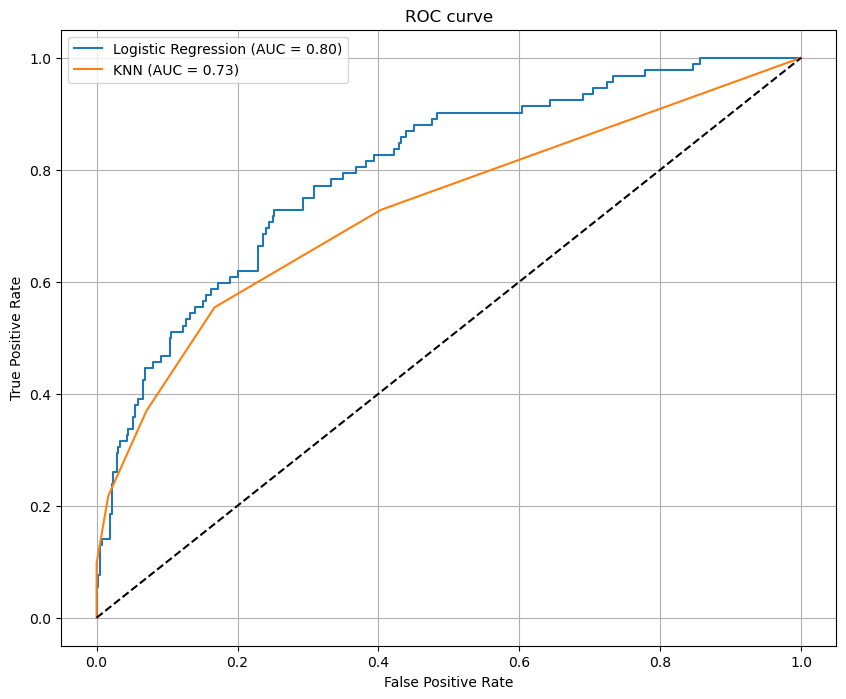

In [428]:
plt.figure(figsize=(10, 8))
plot_roc_curve(logreg, x_test, y_test, ax=plt.gca(), name='Logistic Regression')
plot_roc_curve(knn, x_test, y_test, ax=plt.gca(), name='KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

The further the curve is away from the diagonal line and towards the top-left corner, the better the model. In this case, the graph shows that the Logistic Regression model has better performance than KNN.